# Machine Learning on Text: Clustering Assignment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Ingest the company_profiles data set into a corpus.

In [5]:
PATH = '/content/drive/MyDrive/python_for_data_scientists/company_profiles'

DOC_PATTERN = r'.*\.txt'
#CAT_PATTERN = r'([\w_\s]+)/.*'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)#, cat_pattern=CAT_PATTERN)

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [6]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [7]:
def preprocess(docs):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')
  preprocessed = []

  for doc in docs:
    tokenized = word_tokenize(doc)
    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
               for token in tokenized 
               if not token.lower() in stopwords.words('english') 
               if token.isalpha()]

    untokenized = ' '.join(cleaned)
    preprocessed.append(untokenized)
  return preprocessed

In [8]:
good_to_go = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [10]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(good_to_go)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [13]:
kmean = KMeans()
#clus = kmean.fit_predict(vectors)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fedb1303da0>,
                 k=None, metric=None, model=None, timings=True)

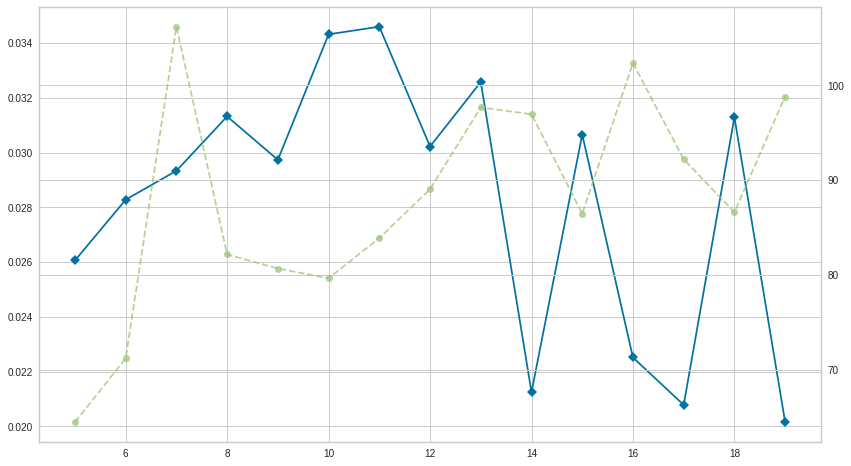

In [17]:
visualizer = KElbowVisualizer(kmean, k=(5,20), metric='silhouette')
visualizer.fit(vectors)
#visualizer.show()

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [19]:
kmean = KMeans(n_clusters= 11)
clus_kmean = kmean.fit_predict(vectors)

### Perform Agglomerative Clustering using the same number of clusters.

In [21]:
agg = AgglomerativeClustering(n_clusters= 11)
clus_agg = agg.fit_predict(vectors.toarray())

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [22]:
num_keywords = 5
num_topics = 11

Non-Negative Matrix Factorization

In [25]:
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer()
model_NMF = NMF(n_components = num_topics) 

vectors = vectorizer.fit_transform(good_to_go)
model_NMF.fit_transform(vectors)

results = [[(vectorizer.get_feature_names()[i], topic[i])
             for i in topic.argsort()[:-num_keywords - 1: -1]]
             for topic in model_NMF.components_]

topics = [[x[0] for x in i] for i in results]      

In [26]:
topics

[['loan', 'bank', 'deposit', 'account', 'commerci'],
 ['servic', 'manag', 'segment', 'provid', 'financi'],
 ['oil', 'gas', 'natur', 'texa', 'crude'],
 ['fund', 'invest', 'equiti', 'incom', 'stock'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['product', 'system', 'manufactur', 'industri', 'segment'],
 ['insur', 'life', 'liabil', 'product', 'casualti'],
 ['store', 'brand', 'product', 'retail', 'oper'],
 ['real', 'properti', 'estat', 'invest', 'trust'],
 ['solut', 'softwar', 'data', 'network', 'communic'],
 ['electr', 'gas', 'generat', 'energi', 'power']]

Latent Dirichlet Allocation (LDA)

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer_ = CountVectorizer()
model_LDA = LatentDirichletAllocation(n_components = num_topics, learning_method='online')

vectors_ = vectorizer_.fit_transform(good_to_go)
model_LDA.fit_transform(vectors_)

results_ = [[(vectorizer_.get_feature_names()[i], topic[i])
             for i in topic.argsort()[:-num_keywords - 1: -1]]
             for topic in model_LDA.components_]

topics_ = [[x[0] for x in i] for i in results_]

In [31]:
topics_

[['madden', 'threat', 'wolverin', 'splunk', 'alto'],
 ['servic', 'compani', 'provid', 'manag', 'loan'],
 ['compani', 'develop', 'product', 'treatment', 'clinic'],
 ['inhibitor', 'railcar', 'commerci', 'growth', 'ii'],
 ['product', 'compani', 'segment', 'system', 'manufactur'],
 ['water', 'wastewat', 'rehabilit', 'trex', 'pipelin'],
 ['compani', 'oper', 'store', 'brand', 'state'],
 ['wast', 'coal', 'dispos', 'recycl', 'landfil'],
 ['hotspot', 'sinus', 'cabaret', 'ooma', 'fitbit'],
 ['fruit', 'fresh', 'qad', 'veget', 'flower'],
 ['educ', 'learn', 'patent', 'student', 'school']]

Latent Semantic Analysis (LSA)

In [30]:
from sklearn.decomposition import TruncatedSVD

vectorizer__ = TfidfVectorizer()
model_LSA = TruncatedSVD(n_components = num_topics)

vectors__ = vectorizer__.fit_transform(good_to_go)
model_LSA.fit_transform(vectors__)

results__ = [[(vectorizer__.get_feature_names()[i], topic[i])
             for i in topic.argsort()[:-num_keywords - 1: -1]]
             for topic in model_LSA.components_]

topics__ = [[x[0] for x in i] for i in results__]

In [32]:
topics__

[['loan', 'servic', 'bank', 'compani', 'product'],
 ['loan', 'bank', 'deposit', 'account', 'estat'],
 ['gas', 'natur', 'oil', 'energi', 'texa'],
 ['invest', 'fund', 'incom', 'manag', 'equiti'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['servic', 'manag', 'insur', 'solut', 'gas'],
 ['insur', 'store', 'product', 'properti', 'liabil'],
 ['insur', 'segment', 'life', 'liabil', 'system'],
 ['properti', 'real', 'estat', 'insur', 'reit'],
 ['servic', 'electr', 'segment', 'generat', 'facil'],
 ['electr', 'insur', 'power', 'generat', 'distribut']]

In [33]:
print(topics)
print(topics_)
print(topics__)

[['loan', 'bank', 'deposit', 'account', 'commerci'], ['servic', 'manag', 'segment', 'provid', 'financi'], ['oil', 'gas', 'natur', 'texa', 'crude'], ['fund', 'invest', 'equiti', 'incom', 'stock'], ['treatment', 'phase', 'clinic', 'trial', 'develop'], ['product', 'system', 'manufactur', 'industri', 'segment'], ['insur', 'life', 'liabil', 'product', 'casualti'], ['store', 'brand', 'product', 'retail', 'oper'], ['real', 'properti', 'estat', 'invest', 'trust'], ['solut', 'softwar', 'data', 'network', 'communic'], ['electr', 'gas', 'generat', 'energi', 'power']]
[['madden', 'threat', 'wolverin', 'splunk', 'alto'], ['servic', 'compani', 'provid', 'manag', 'loan'], ['compani', 'develop', 'product', 'treatment', 'clinic'], ['inhibitor', 'railcar', 'commerci', 'growth', 'ii'], ['product', 'compani', 'segment', 'system', 'manufactur'], ['water', 'wastewat', 'rehabilit', 'trex', 'pipelin'], ['compani', 'oper', 'store', 'brand', 'state'], ['wast', 'coal', 'dispos', 'recycl', 'landfil'], ['hotspot',